# Human Resources Dataset: Explarotary Data Analysis

**In this project, we tried to analyze human resources data by performing data wrangling and EDA**  
By working on this project we will learn how to:  
* Perform statistical analysis on real world data
* Deal with missing data using pandas
* Perform one-hot encoding
* Perform scaling including normalization and standardization
* Define a function and apply it to a Pandas DataFrame column
* Perform Pandas operations and filtering
* Calculate and display correlation matrix and heatmaps

# TASK-1: IMPORT DATASET AND PERFORM BASIC STATISTICAL DATA ANALYSIS

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets force pandas to display all rows and columns. Otherwise we will anly see summarized output which is sometimes is not too useful

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
# we import the dataset and observe the first records

df = pd.read_csv('Human_Resources.csv')
df.head()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1.0,2,Female,94,3,2,Sales Executive,4,Single,19479.0,8,Y,Yes,11.0,3.0,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,Y,No,23.0,4.0,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4.0,4,Male,92,2,1,Laboratory Technician,3,Single,2396.0,6,Y,Yes,15.0,3.0,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5.0,4,Female,56,3,1,Research Scientist,3,Married,23159.0,1,Y,Yes,11.0,3.0,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7.0,1,Male,40,3,1,Laboratory Technician,2,Married,16632.0,9,Y,No,12.0,3.0,4,80,1,6,3,3,2,2,2,2


In [4]:
# Lets also have a look to the end of our dataset

df.tail()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,2571.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061.0,3,Male,41,4,2,Laboratory Technician,4,Married,12290.0,4,Y,No,17.0,3.0,3,80,1,17,3,3,5,2,0,3
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062.0,4,Male,42,2,3,Healthcare Representative,1,Married,21457.0,4,Y,No,15.0,3.0,1,80,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064.0,2,Male,87,4,2,Manufacturing Director,2,Married,5174.0,1,Y,Yes,20.0,4.0,2,80,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065.0,4,Male,63,2,2,Sales Executive,2,Married,13243.0,2,Y,No,14.0,3.0,4,80,0,17,3,2,9,6,0,8
1469,34,4404.0,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068.0,2,Male,82,4,2,Laboratory Technician,3,Married,10228.0,2,Y,No,12.0,3.0,1,80,0,6,3,4,4,3,1,2


In [5]:
# lets see how many features and instances we have in our dataset

df.shape

(1470, 35)

**As we see above, we have 1470 instances with 35 features**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   MonthlyIncome             1467 non-null   float64
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1469 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1469 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EmployeeNumber            1469 non-null   float64
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1469 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvol

In [7]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1469,3,Research & Development,960
EducationField,1469,6,Life Sciences,606
Gender,1469,2,Male,882
JobRole,1469,9,Sales Executive,326
MaritalStatus,1469,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [8]:
# lets see the summary statistics of our dataset's numericalfeatures
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
MonthlyIncome,1467.0,6505.155419,4711.297846,1009.0,2911.00,4908.0,8378.00,19999.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1469.0,1025.556161,601.646166,1.0,492.00,1022.0,1556.00,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


**Goruldugu gibi bu datasetinde 1470 farkli calisanin, calisma hayatlariyla ilgiler bilgiler duzenlenmistir**

Kisa bir ozet yapmak gerekirse, calisanlarin yas ortalamasi 37 olup ortalama 6505 USD maas almaktadirlar. Ortalama, bir calisanin calisma suresi ise 11 yildir  

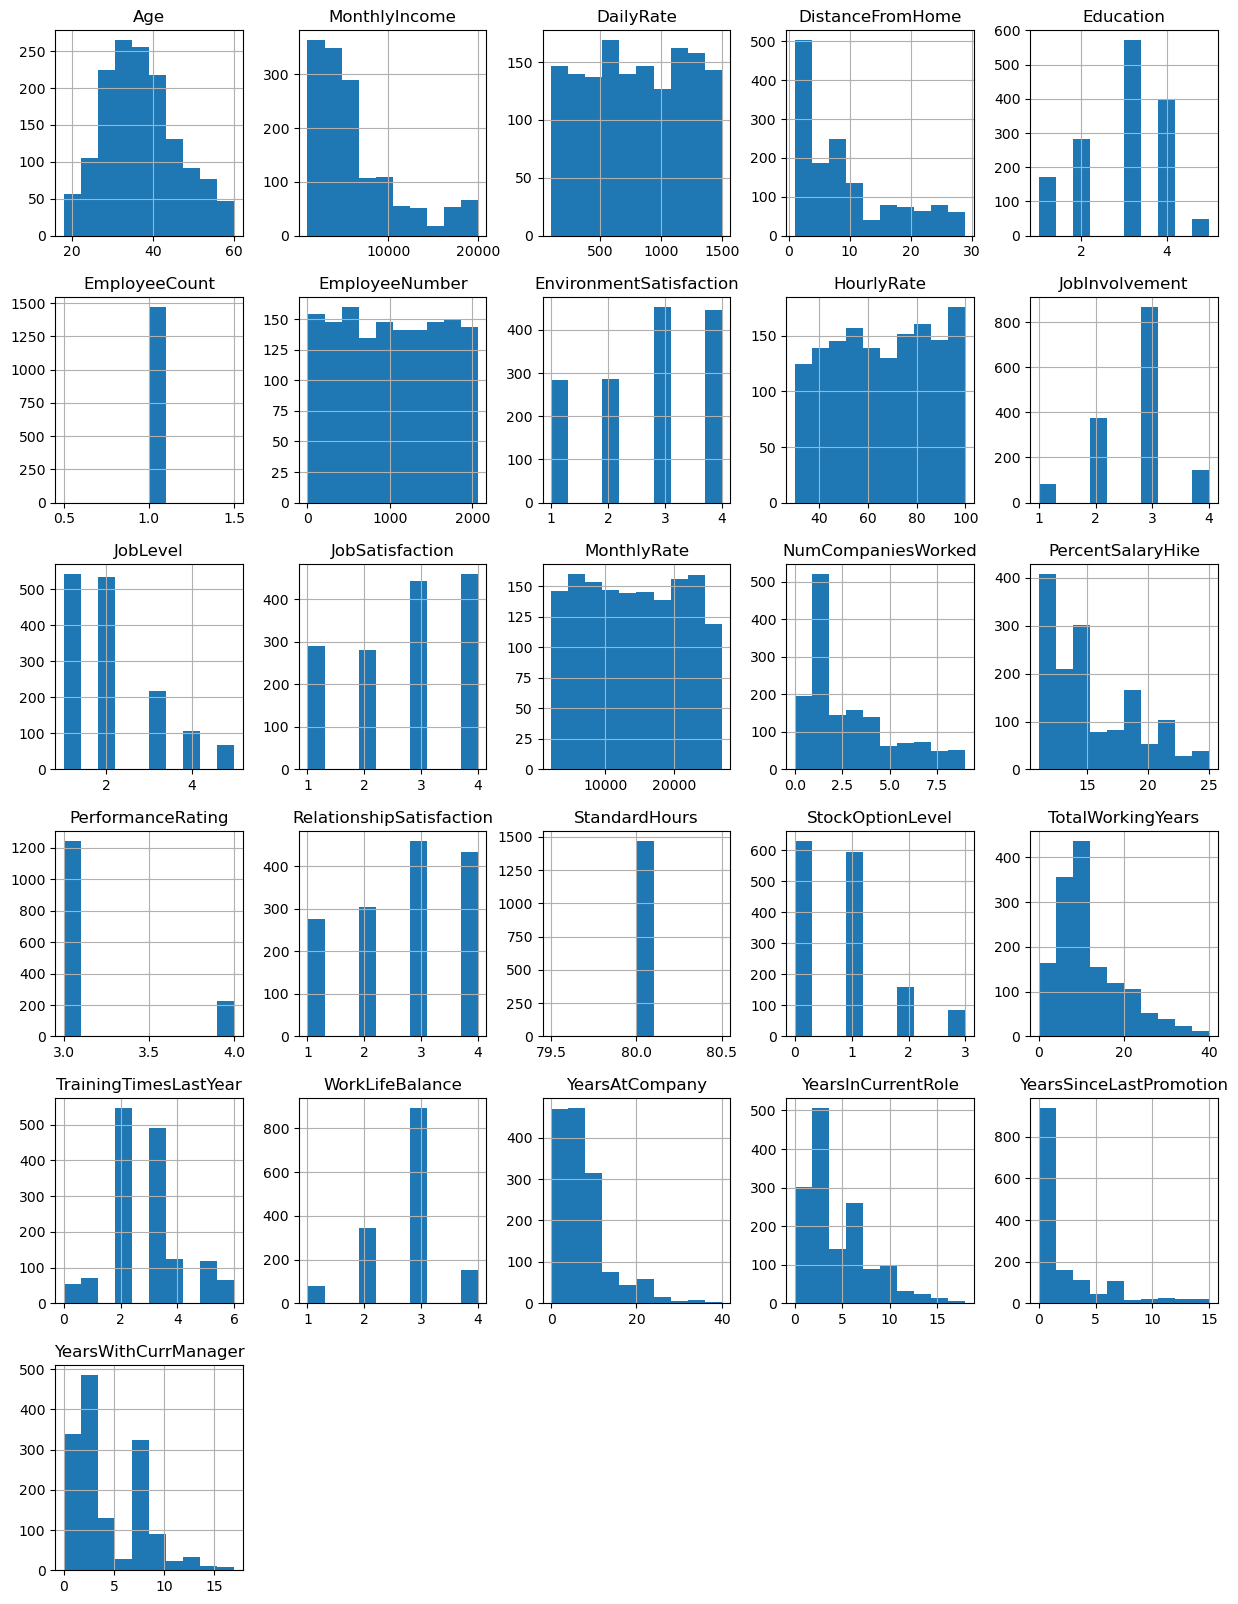

In [9]:
df.select_dtypes(include='number').hist(figsize=(15,20))
plt.show()

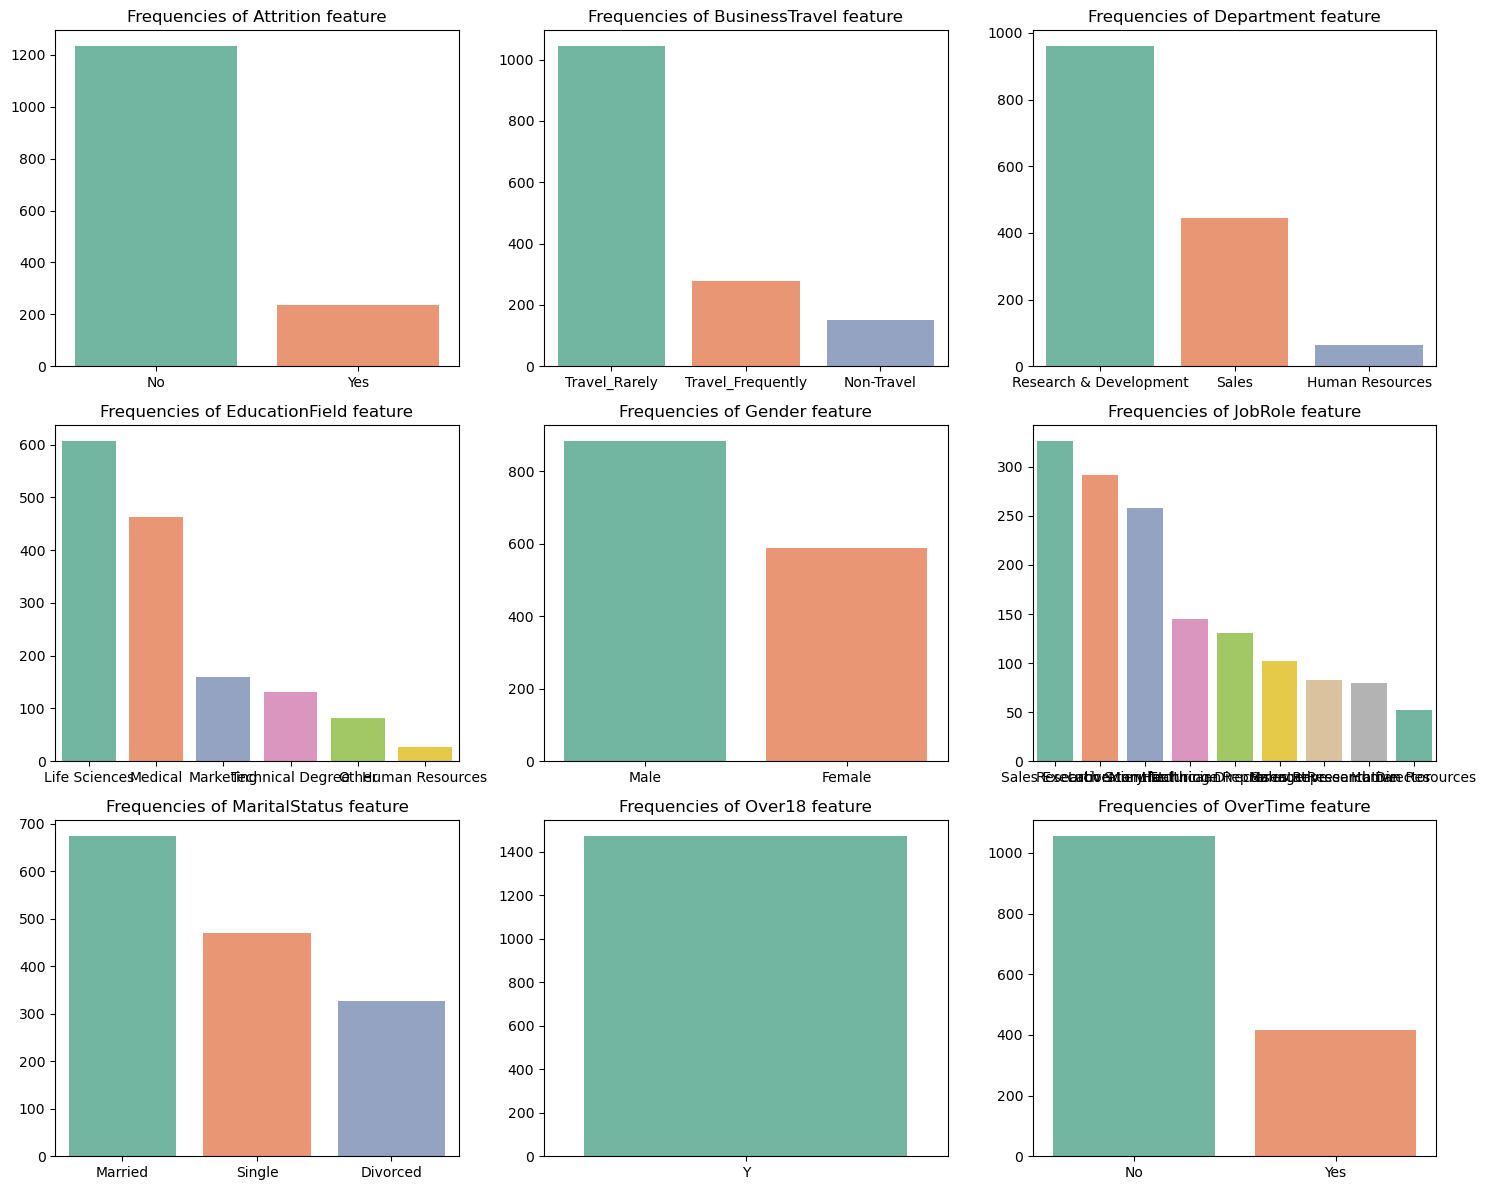

In [10]:
categorical_columns = df.select_dtypes(include='object').columns

# Define a color palette
colors = sns.color_palette('Set2', len(categorical_columns))

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, ax in enumerate(axes.flatten()):
    col = categorical_columns[i]
    val_cnt = df[col].value_counts()
    sns.barplot(x=val_cnt.index, y=val_cnt.values, ax=ax, palette=colors)
    ax.set_title(f"Frequencies of {col} feature")

plt.tight_layout()
plt.show()

In [11]:
#sum prominent features mean values

mean_columns = ['Age', 'MonthlyIncome', 'TotalWorkingYears']
df.describe().T.loc[mean_columns, 'mean'].to_frame()

,mean
Age,36.923810
MonthlyIncome,6505.155419
TotalWorkingYears,11.279592


In [12]:
# lets also see some other metrics related to employee ages
# There is a subtle usage of ' and " here, lets notice this difference
# Remember to use " not ' to escape ' in the f string
# Also notice to write the code in 2 lines according to PEP rules, and printing out the results in 2 lines according to PEP rules

print(f"The average of employee age is {round(np.mean(df['Age']))}"
      f"\nwhere as the minimum and maximum ages are {np.min(df['Age'])} and {np.max(df['Age'])} consecutively")

The average of employee age is 37
where as the minimum and maximum ages are 18 and 60 consecutively


# TASK-2: DEALING WITH MISSING DATA

**One important note**  
Checking missing values before diving into the dataset is a crucial operation,  
however it's also important that all NaN values **may not be missing values**.  
Sometimes it might BE a value of a corresponding categorical value  
You should be aware of that

## Filtering ROWS having Nan or Null Values

Here, lets notice the usage of **axis** in any statement  
**df.isnull()** returns a dataframe with True and False values.  
**any(axis=1)** is filtering this dataframe --> Any ask each rows that is there any True value in a corresponding COLUMN (axis=1)  
**df.isnull().any()** default axis=0; ask the same question to each column whether it has any missing value at ANY rows   

In [13]:
print(f"There are {len(df[df.isnull().any(axis=1)])} rows with MISSING VALUES \n\n")

df[df.isnull().any(axis=1)]

#another version of this code
#df[df.isnull().sum(axis=1)>0]

There are 7 rows with MISSING VALUES 




,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,Y,No,23.0,4.0,4,80,1,10,3,3,10,7,1,7
6,59,NaN,No,Travel_Rarely,1324,Research & Development,3,3,NaN,1,NaN,3,NaN,81,4,1,NaN,1,Married,9964.0,4,Y,Yes,NaN,NaN,1,80,3,12,3,2,1,0,0,0
7,30,2693.0,No,Travel_Rarely,1358,NaN,24,1,Life Sciences,1,11.0,4,Male,67,3,1,Laboratory Technician,3,Divorced,13335.0,1,Y,No,22.0,4.0,2,80,1,1,2,3,1,0,0,0
17,22,2935.0,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22.0,4,Male,96,4,1,Laboratory Technician,4,NaN,7324.0,1,Y,Yes,13.0,3.0,2,80,2,1,2,2,1,0,0,0
23,21,1232.0,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30.0,3,Male,96,3,1,Research Scientist,4,Single,NaN,1,Y,No,14.0,3.0,4,80,0,0,6,3,0,0,0,0
103,34,4809.0,No,Travel_Rarely,665,Research & Development,6,4,Other,1,138.0,1,Female,41,3,2,Research Scientist,3,Single,NaN,1,Y,No,14.0,3.0,3,80,0,16,3,3,16,13,2,10
947,52,NaN,Yes,Travel_Rarely,1030,Sales,5,3,Life Sciences,1,1319.0,2,Male,64,3,3,Sales Executive,2,Single,21534.0,9,Y,Yes,19.0,3.0,3,80,0,10,2,2,8,7,7,7


At the results above it's obvious that **Row index 6** has many missing values. Lets also check which rows have how many missing values

In [14]:
df.isnull().sum(axis=1).iloc[df[df.isnull().sum(axis=1)>0].index]

1      1
6      7
7      1
17     1
23     1
103    1
947    1
dtype: int64

## Filtering COLUMNS having Nan or Null Values

In [15]:
nan_column_count = df.isnull().any().sum()
print(f"Totally {nan_column_count} columns have missing values ")

Totally 10 columns have missing values 


In [16]:
df.isnull().sum().nlargest(nan_column_count+1)

MonthlyIncome        3
MonthlyRate          2
Department           1
EducationField       1
EmployeeNumber       1
Gender               1
JobRole              1
MaritalStatus        1
PercentSalaryHike    1
PerformanceRating    1
Age                  0
dtype: int64

## Dropping the NaN values

In [17]:
df.dropna(axis=0, inplace=True)

In [18]:
df.shape

(1463, 35)

After dropping 7 columns that have any nan values, now we have **1463 instances**

In [19]:
# Lets double check whether we have any missing values

df.isnull().sum().nlargest(5)

Age               0
MonthlyIncome     0
Attrition         0
BusinessTravel    0
DailyRate         0
dtype: int64

## An Alternative Way for Missing Values: IMPUTATION

Since dropping any missing values are the easiest way to handling with missing values it may not be the smartest solution everytime.   
There are several ways  and one of them is imputation - on other words - filling them someway  
There are also several ways for imputation, for example:  
- Imputation with Mean/Median/Most Frequent Value
- Forward or Backward Fill
- Imputation with Machine Learning Models
- Using Statistical Methods
- Use of Domain Knowledge
etc..

In [20]:
# lets call back the DATA and missing value rows

df = pd.read_csv('Human_Resources.csv')
nan_column_count = df.isnull().any().sum()
print(f"Totally {nan_column_count} columns have missing values ")

Totally 10 columns have missing values 


In [21]:
df.isnull().sum().nlargest(nan_column_count)

MonthlyIncome        3
MonthlyRate          2
Department           1
EducationField       1
EmployeeNumber       1
Gender               1
JobRole              1
MaritalStatus        1
PercentSalaryHike    1
PerformanceRating    1
dtype: int64

Lets check **dataypes** of features having missing values. Then we will **impute** the missing values **accordingly**

In [22]:
missing_columns = df.isnull().sum().nlargest(nan_column_count).index

In [23]:
df[missing_columns].dtypes

MonthlyIncome        float64
MonthlyRate          float64
Department            object
EducationField        object
EmployeeNumber       float64
Gender                object
JobRole               object
MaritalStatus         object
PercentSalaryHike    float64
PerformanceRating    float64
dtype: object

We can simply fill float missing values by the mean of this feature **(except EmployeNumber - it should be an ordinal sequence)**  
and any categorical features (object) by the feature's mode

In [24]:
fill_with_mean_features = ['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating']
fill_with_mean_features

['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating']

In [25]:
df[fill_with_mean_features] = df[fill_with_mean_features].fillna(df.mean())

In [26]:
df[fill_with_mean_features].isnull().any().any()

False

In [27]:
# lets figure out how we can impute EmployeeNumber
df['EmployeeNumber'].head()

0    1.0
1    2.0
2    4.0
3    5.0
4    7.0
Name: EmployeeNumber, dtype: float64

In [28]:
df[df['EmployeeNumber'].isnull()==True]

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,59,6505.155419,No,Travel_Rarely,1324,Research & Development,3,3,NaN,1,NaN,3,NaN,81,4,1,NaN,1,Married,9964.0,4,Y,Yes,15.206263,3.153165,1,80,3,12,3,2,1,0,0,0


In [29]:
df['EmployeeNumber'].iloc[3:10]

3     5.0
4     7.0
5     8.0
6     NaN
7    11.0
8    12.0
9    13.0
Name: EmployeeNumber, dtype: float64

In [30]:
# So we can impute this missing value with exactly 9.0 value

df['EmployeeNumber'] = df['EmployeeNumber'].fillna(9.0)
df['EmployeeNumber'].isnull().any()

False

In [31]:
# lets see the filled value

df.iloc[6]['EmployeeNumber']

9.0

In [32]:
# Lets impute the object (categorical) features as well

fill_with_mode_features = df[missing_columns].select_dtypes(include=['object']).columns.tolist()
fill_with_mode_features

['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

In [33]:
# Lets see the mode values of each object features with Nan values
df[fill_with_mode_features].mode()

,Department,EducationField,Gender,JobRole,MaritalStatus
0,Research & Development,Life Sciences,Male,Sales Executive,Married


In [34]:
# here, its a little bit different than filling wth mean. df.mode() returns a dataframe so we have to use iloc to filter the exact mode to fill

df[fill_with_mode_features] = df[fill_with_mode_features].fillna(df.mode().iloc[0])

In [35]:
# lets finally check again whether we have any remaining Nan values 

df.isnull().any().any()

False

# TASK-3: PERFORM ONE-HOT ENCODING [OPTIONAL]

I will work on a new dataframe named df_2 for the optional parts of the project

- **Import the Human Resources data and remove all missing values**
- **How many unique categories exist in the Education Field column?**
- **Perform one hot encoding to the Education Field column**

In [36]:
import pandas as pd

In [37]:
df_2 = pd.read_csv('Human_Resources.csv')
df_2.shape

(1470, 35)

In [38]:
df_2.dropna(inplace=True)

In [39]:
df_2.shape

(1463, 35)

In [40]:
df_2.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

## Alternative-1: Pandas Get Dummies

In [41]:
print(f"  {len(df['EducationField'].unique())}  unique categories exist in Education Field Column\n")
df_2['EducationField'].unique()

  6  unique categories exist in Education Field Column



array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [42]:
education_field_encoded = pd.get_dummies(df_2['EducationField'])
education_field_encoded

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0
...,...,...,...,...,...,...
1465,0,0,0,1,0,0
1466,0,0,0,1,0,0
1467,0,1,0,0,0,0
1468,0,0,0,1,0,0


## Alternative-2: Scikit Learn OneHotEncoder

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder = OneHotEncoder()

In [45]:
business_travel_encoded_data = encoder.fit_transform(df[['BusinessTravel']])
feature_names = encoder.get_feature_names_out(input_features=['BusinessTravel'])

In [46]:
business_travel_encoded_df = pd.DataFrame(business_travel_encoded_data.toarray(), columns=feature_names)
business_travel_encoded_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [47]:
df_2.drop(columns=['EducationField', 'BusinessTravel'], inplace=True)

In [48]:
df_2 = pd.concat([df_2, education_field_encoded, business_travel_encoded_df], axis=1)
df_2.head()

,Age,MonthlyIncome,Attrition,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41.0,5993.0,Yes,1102.0,Sales,1.0,2.0,1.0,1.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,37.0,2090.0,Yes,1373.0,Research & Development,2.0,2.0,1.0,4.0,4.0,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,2396.0,6.0,Y,Yes,15.0,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,33.0,2909.0,No,1392.0,Research & Development,3.0,4.0,1.0,5.0,4.0,Female,56.0,3.0,1.0,Research Scientist,3.0,Married,23159.0,1.0,Y,Yes,11.0,3.0,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27.0,3468.0,No,591.0,Research & Development,2.0,1.0,1.0,7.0,1.0,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,16632.0,9.0,Y,No,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,32.0,3068.0,No,1005.0,Research & Development,2.0,2.0,1.0,8.0,4.0,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,11864.0,0.0,Y,No,13.0,3.0,3.0,80.0,0.0,8.0,2.0,2.0,7.0,7.0,3.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# TASK-4: PERFORM SCALING (NORMALIZATION & STANDARDIZATION) [OPTIONAL]

- Normalization and standardization are preprocessing techniques in data science.
- **Normalization** scales features to a range of [0, 1], making them comparable.
- **Standardization** transforms features to have a mean of 0 and a standard deviation of 1, which is helpful for algorithms sensitive to feature scales.
- Both techniques ensure features have similar impact on models.

## Normalization

In [49]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [50]:
pip install -U scikit-learn

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
# lets create a MinMaxScaler instance from MinMaxScaler Class (Remember OOP)
scaler = MinMaxScaler()

normalizasyon ve standardizasyonda tek column uzerinde islem yapacaksak 2d reshape yapiyoruz (-1,1). Birden fazla column yapacaksak asagidaki gibi yapiyoruz

In [53]:
df_2['Age']

0      41.0
2      37.0
3      33.0
4      27.0
5      32.0
       ... 
7       NaN
17      NaN
23      NaN
103     NaN
947     NaN
Name: Age, Length: 1470, dtype: float64

In [54]:
df_2['Age'] = scaler.fit_transform(df_2['Age'].values.reshape(-1,1) )

In [55]:
df_2['Age']

0      0.547619
2      0.452381
3      0.357143
4      0.214286
5      0.333333
         ...   
7           NaN
17          NaN
23          NaN
103         NaN
947         NaN
Name: Age, Length: 1470, dtype: float64

In [56]:
df_2.head()

,Age,MonthlyIncome,Attrition,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0.547619,5993.0,Yes,1102.0,Sales,1.0,2.0,1.0,1.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.452381,2090.0,Yes,1373.0,Research & Development,2.0,2.0,1.0,4.0,4.0,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,2396.0,6.0,Y,Yes,15.0,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.357143,2909.0,No,1392.0,Research & Development,3.0,4.0,1.0,5.0,4.0,Female,56.0,3.0,1.0,Research Scientist,3.0,Married,23159.0,1.0,Y,Yes,11.0,3.0,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,3468.0,No,591.0,Research & Development,2.0,1.0,1.0,7.0,1.0,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,16632.0,9.0,Y,No,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0.333333,3068.0,No,1005.0,Research & Development,2.0,2.0,1.0,8.0,4.0,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,11864.0,0.0,Y,No,13.0,3.0,3.0,80.0,0.0,8.0,2.0,2.0,7.0,7.0,3.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Standardization

Perform feature scaling by performing standardization (Recall that Standardization is conducted to transform the data to have a mean of zero and standard deviation of 1.

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
std_scaler = StandardScaler()

In [59]:
help(std_scaler)

Help on StandardScaler in module sklearn.preprocessing._data object:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual fea

**Standardization is generally applied to numeric features either on discrete or continuous**

In [60]:
# Lets choose 4 columns for standardization
columns_to_standard = ['MonthlyIncome', 'HourlyRate', 'JobSatisfaction', 'DistanceFromHome']

In [61]:
df_2_standardized_columns = std_scaler.fit_transform(df[columns_to_standard])
pd.DataFrame(df_2_standardized_columns)

,0,1,2,3
0,-0.108856,1.383138,1.153254,-1.010909
1,0.000000,-0.240677,-0.660853,-0.147150
2,-0.938420,1.284725,0.246200,-0.887515
3,-0.764345,-0.486709,0.246200,-0.764121
4,-0.645533,-1.274014,-0.660853,-0.887515
...,...,...,...,...
1465,-0.836186,-1.224807,1.153254,1.703764
1466,0.740899,-1.175601,-1.567907,-0.393938
1467,-0.077187,1.038693,-0.660853,-0.640727
1468,-0.237021,-0.142264,-0.660853,-0.887515


**Lets check whether our mean is 0 and std is 1** 

In [62]:
pd.DataFrame(df_2_standardized_columns).describe().T

,count,mean,std,min,25%,50%,75%,max
0,1470.0,-6.283711e-17,1.00034,-1.168181,-0.763123,-0.334154,0.396045,2.868051
1,1470.0,1.691768e-16,1.00034,-1.766079,-0.880361,0.005356,0.878771,1.678377
2,1470.0,-9.183886e-17,1.00034,-1.567907,-0.660853,0.246200,1.153254,1.153254
3,1470.0,4.350262e-17,1.00034,-1.010909,-0.887515,-0.270544,0.593216,2.444129


# TASK-5: PANDAS OPERATIONS/FILTERING

In [63]:
df.head()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.000000,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1.0,2,Female,94,3,2,Sales Executive,4,Single,19479.0,8,Y,Yes,11.0,3.0,1,80,0,8,0,1,6,4,0,5
1,49,6505.155419,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,Y,No,23.0,4.0,4,80,1,10,3,3,10,7,1,7
2,37,2090.000000,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4.0,4,Male,92,2,1,Laboratory Technician,3,Single,2396.0,6,Y,Yes,15.0,3.0,2,80,0,7,3,3,0,0,0,0
3,33,2909.000000,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5.0,4,Female,56,3,1,Research Scientist,3,Married,23159.0,1,Y,Yes,11.0,3.0,3,80,0,8,3,3,8,7,3,0
4,27,3468.000000,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7.0,1,Male,40,3,1,Laboratory Technician,2,Married,16632.0,9,Y,No,12.0,3.0,4,80,1,6,3,3,2,2,2,2


In [64]:
# filter employees under 20 age

mask_age_U20 = df['Age'] < 20
df[mask_age_U20].sample(5)

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
149,19,1483.0,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201.0,2,Female,79,3,1,Laboratory Technician,2,Single,16102.0,1,Y,No,14.0,3.0,4,80,0,1,3,3,1,0,0,0
972,18,1611.0,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368.0,4,Female,97,3,1,Laboratory Technician,4,Single,19305.0,1,Y,No,15.0,3.0,3,80,0,0,5,4,0,0,0,0
688,19,2121.0,Yes,Travel_Rarely,419,Sales,21,3,Other,1,959.0,4,Male,37,2,1,Sales Representative,2,Single,9947.0,1,Y,Yes,13.0,3.0,2,80,0,1,3,4,1,0,0,0
727,18,1051.0,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012.0,2,Male,73,3,1,Research Scientist,4,Single,13493.0,1,Y,No,15.0,3.0,4,80,0,0,2,3,0,0,0,0
828,18,1904.0,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156.0,3,Male,80,3,1,Laboratory Technician,3,Single,13556.0,1,Y,No,12.0,3.0,4,80,0,0,0,3,0,0,0,0


In [65]:
# filter employees travel_frequently AND married

mask_married_travel = (df['BusinessTravel'] == 'Travel_Frequently')  & (df['MaritalStatus'] == 'Married')
df[mask_married_travel].sample(5)

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
762,26,2042.0,Yes,Travel_Frequently,342,Research & Development,2,3,Life Sciences,1,1053.0,1,Male,57,3,1,Research Scientist,1,Married,15346.0,6,Y,Yes,14.0,3.0,2,80,1,6,2,3,3,2,1,2
528,50,6796.0,Yes,Travel_Frequently,562,Sales,8,2,Technical Degree,1,723.0,2,Male,50,3,2,Sales Executive,3,Married,23452.0,3,Y,Yes,14.0,3.0,1,80,1,18,4,3,4,3,1,3
479,24,2886.0,Yes,Travel_Frequently,1287,Research & Development,7,3,Life Sciences,1,647.0,1,Female,55,3,1,Laboratory Technician,3,Married,14168.0,1,Y,Yes,16.0,3.0,4,80,1,6,4,3,6,3,1,2
1438,23,1790.0,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023.0,4,Male,33,3,1,Sales Representative,1,Married,26956.0,1,Y,No,19.0,3.0,1,80,1,1,3,2,1,0,1,0
697,29,2157.0,No,Travel_Frequently,1404,Sales,20,3,Technical Degree,1,974.0,3,Female,84,3,1,Sales Representative,4,Married,18203.0,1,Y,No,15.0,3.0,2,80,1,3,5,3,3,1,0,2


In [66]:
# filter employees have monthly income between 5000-7000 USD

mask_income_between = df['MonthlyIncome'].between(5000, 7000)
df[mask_income_between].sample(5)

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1159,39,5042.0,No,Travel_Frequently,711,Research & Development,4,3,Medical,1,1633.0,1,Female,81,3,2,Manufacturing Director,3,Single,3140.0,0,Y,No,13.0,3.0,4,80,0,10,2,1,9,2,3,8
621,36,6201.0,No,Travel_Rarely,928,Sales,1,2,Life Sciences,1,857.0,2,Male,56,3,2,Sales Executive,4,Married,2823.0,1,Y,Yes,14.0,3.0,4,80,1,18,1,2,18,14,4,11
73,32,6220.0,No,Travel_Rarely,548,Research & Development,1,3,Life Sciences,1,96.0,2,Male,66,3,2,Research Scientist,2,Married,7346.0,1,Y,No,17.0,3.0,2,80,2,10,3,3,10,4,0,9
1231,46,5562.0,No,Travel_Rarely,717,Research & Development,13,4,Life Sciences,1,1727.0,3,Male,34,3,2,Healthcare Representative,2,Single,9697.0,6,Y,No,14.0,3.0,4,80,0,19,3,3,10,7,0,9
220,36,5914.0,No,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304.0,4,Male,62,3,2,Laboratory Technician,2,Single,9945.0,8,Y,No,16.0,3.0,4,80,0,16,3,4,13,11,3,7


In [67]:
# Lets see high valued employees who has a DailyRate of 1450 and above

mask_daily_rate_high = df['DailyRate'] > 1450
df[mask_daily_rate_high].sample(5)

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
155,29,4319.0,No,Non-Travel,1496,Research & Development,1,1,Technical Degree,1,208.0,4,Male,41,3,2,Manufacturing Director,3,Married,26283.0,1,Y,No,13.0,3.0,1,80,1,10,1,3,10,7,0,9
52,44,5454.0,No,Travel_Rarely,1488,Sales,1,5,Marketing,1,68.0,2,Female,75,3,2,Sales Executive,1,Divorced,4009.0,5,Y,Yes,21.0,4.0,3,80,1,9,2,2,4,3,1,3
1044,49,6651.0,No,Travel_Rarely,1495,Research & Development,5,4,Technical Degree,1,1473.0,1,Male,96,3,2,Healthcare Representative,3,Married,21534.0,2,Y,No,14.0,3.0,2,80,1,20,0,2,3,2,1,2
427,60,10266.0,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573.0,3,Female,80,2,3,Sales Executive,1,Married,2845.0,4,Y,No,19.0,3.0,4,80,0,22,5,4,18,13,13,11
117,36,9738.0,No,Travel_Frequently,1467,Sales,11,2,Technical Degree,1,154.0,2,Female,92,3,3,Sales Executive,4,Married,22952.0,0,Y,No,14.0,3.0,3,80,1,10,6,3,9,7,2,8


In [68]:
# The manager is also asking 'the combined Daily Rate for all employees with 1450+"

df[mask_daily_rate_high]['DailyRate'].sum()

70849

In [69]:
print(f"{len(df[mask_daily_rate_high])} employees are making 1450+ Daily Rate\n"  
      f"within {len(df)} employees this total {len(df[mask_daily_rate_high])} employees are generating {df[mask_daily_rate_high]['DailyRate'].sum()} cumulatively" )

48 employees are making 1450+ Daily Rate
within 1470 employees this total 48 employees are generating 70849 cumulatively


# TASK-6: PERFORM BASIC EDA ON BOTH CLASSES

## Dropping some Columns

In [70]:
# dataset shape before dropping any values

df.shape

(1470, 35)

**It makes sense to drop 'EmployeeCount', 'Standardhours' and 'Over18' since they do not change from one employee to the other**

In [71]:
df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

In [72]:
# dataset shape AFTER dropping any values

df.shape

(1470, 32)

In [73]:
# We can also drop the employee number aswell
# we will drop with some other parametres

df.drop('EmployeeNumber', axis=1, inplace=True)

In [74]:
# dataset shape AFTER dropping any values

df.shape

(1470, 31)

In [75]:
df.head()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.000000,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,19479.0,8,Yes,11.0,3.0,1,0,8,0,1,6,4,0,5
1,49,6505.155419,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,No,23.0,4.0,4,1,10,3,3,10,7,1,7
2,37,2090.000000,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2396.0,6,Yes,15.0,3.0,2,0,7,3,3,0,0,0,0
3,33,2909.000000,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,23159.0,1,Yes,11.0,3.0,3,0,8,3,3,8,7,3,0
4,27,3468.000000,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,16632.0,9,No,12.0,3.0,4,1,6,3,3,2,2,2,2


## A comparison between two Classes

**Lets focus on ATTRITION column to gather some insight about the employees who left the company VS the one who stayed**

In [76]:
# lets filter the data with ones who stayed in the company

df[df['Attrition'] == 'Yes']

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,19479.0,8,Yes,11.0,3.0,1,0,8,0,1,6,4,0,5
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2396.0,6,Yes,15.0,3.0,2,0,7,3,3,0,0,0,0
14,28,2028.0,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,2,1,Laboratory Technician,3,Single,12947.0,5,Yes,14.0,3.0,2,0,6,4,3,4,2,0,3
21,36,3407.0,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,2,1,Sales Representative,1,Single,6986.0,7,No,23.0,4.0,2,0,10,4,3,5,3,0,3
24,34,2960.0,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,83,3,1,Research Scientist,1,Single,17102.0,2,No,11.0,3.0,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1790.0,Yes,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,33,3,1,Sales Representative,1,Married,26956.0,1,No,19.0,3.0,1,1,1,3,2,1,0,1,0
1442,29,4787.0,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,36,3,1,Research Scientist,4,Married,26124.0,9,Yes,14.0,3.0,2,3,4,3,4,2,2,2,2
1444,56,2339.0,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,72,3,1,Laboratory Technician,3,Married,3666.0,8,No,11.0,3.0,4,1,14,4,1,10,9,9,8
1452,50,6728.0,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,94,3,2,Sales Executive,3,Divorced,14255.0,7,No,12.0,3.0,4,2,12,3,3,6,3,0,1


In [77]:
#lets see some statistics of employees stayed in the company

df[df['Attrition'] == 'Yes'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
MonthlyIncome,237.0,4778.903609,3634.122234,1009.0,2373.0,3202.0,5916.0,19859.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


In [78]:
index_list = df[df['Attrition'] == 'Yes'].describe().T.index

In [79]:
df_comparison = pd.DataFrame(columns=['Count_Stayed', 'Count_Left', 'Mean_Stayed', 'Mean_Left'], index=index_list)
df_comparison['Count_Stayed'] = df[df['Attrition'] == 'Yes'].count()
df_comparison['Count_Left'] = df[df['Attrition'] == 'No'].count()
df_comparison['Mean_Stayed'] = df[df['Attrition'] == 'Yes'].mean()
df_comparison['Mean_Left'] = df[df['Attrition'] == 'No'].mean()
df_comparison

,Count_Stayed,Count_Left,Mean_Stayed,Mean_Left
Age,237,1233,33.607595,37.561233
MonthlyIncome,237,1233,4778.903609,6836.965378
DailyRate,237,1233,750.362869,812.504461
DistanceFromHome,237,1233,10.632911,8.915653
Education,237,1233,2.839662,2.927007
EnvironmentSatisfaction,237,1233,2.464135,2.771290
HourlyRate,237,1233,65.573840,65.952149
JobInvolvement,237,1233,2.518987,2.770479
JobLevel,237,1233,1.637131,2.145985
JobSatisfaction,237,1233,2.468354,2.778589


- 1233 employees have left the company whereas 237 are still working in the company.
- The monthly income of employees who left the company is significantly higher than the ones who stayed in
- Also the mean of Age is higher for the employees who left the company.
- Moreover, jobInvolvement is also far much higher amongt the left employees
- Also, normally stock option level is also higher for the employees who left the company due to their higher monthly income, higher job Level and jobInvolvementow()

# TASK-7: PANDAS WITH FUNCTIONS

- **Let's assume the daily rate has increased by 10%**
- **Define a function that increases all clients networth by a fixed value of 10% (for simplicity sake)**
- **assume that net worth increased by 10%**
- **You can apply a function to the DataFrame**

In [80]:
def rate_change(series, pct_change):
    '''
    this function takes a pandas series, as a detached serie or a dataframe with a column
    pd.Series() or df['Column_name']
    pct_change is a negative or positive decimal value
    specify 0.15 for %15 increase or -0.25 for %25 decrease
    '''

    new_series = series * (1 + pct_change)
    return new_series

In [81]:
# print a daily rate before applyying the function

df['DailyRate'][0:5]

0    1102
1     279
2    1373
3    1392
4     591
Name: DailyRate, dtype: int64

In [82]:
df['DailyRate'] = rate_change(df['DailyRate'], 0.10)
df['DailyRate'][0:5]

0    1212.2
1     306.9
2    1510.3
3    1531.2
4     650.1
Name: DailyRate, dtype: float64


- **Define a function that doubles the DailyRate and adds $100**
- **Apply the function to the DataFrame**
- **Calculate the updated total Daily Rate of all employees combined**

In [83]:
def rate_change_2(series):
    return series*2+100

In [84]:
df['DailyRate'][0:5]

0    1212.2
1     306.9
2    1510.3
3    1531.2
4     650.1
Name: DailyRate, dtype: float64

**Since we only take a series as a parametres, we can directly use apply function in this case.**   
**in the above first function, i gave twi paramtres so its better not to use apply method but calling function with params**

In [85]:
df['DailyRate'] = df['DailyRate'].apply(rate_change_2)
df['DailyRate'][0:5]

0    2524.4
1     713.8
2    3120.6
3    3162.4
4    1400.2
Name: DailyRate, dtype: float64

# TASK-8: HISTOGRAM AND CORRELATION



- **Monthly income is strongly correlated with total working hours**
- **Age is strongly correlated with monthly income**

## Histogram - Distribution

Lets plot some histogram to see the **Continuous Numerical** features such as 'MonthlyIncome' and 'TotalWorkingYears'
- it's seen that they tail heavily and RIGHT SKEWED

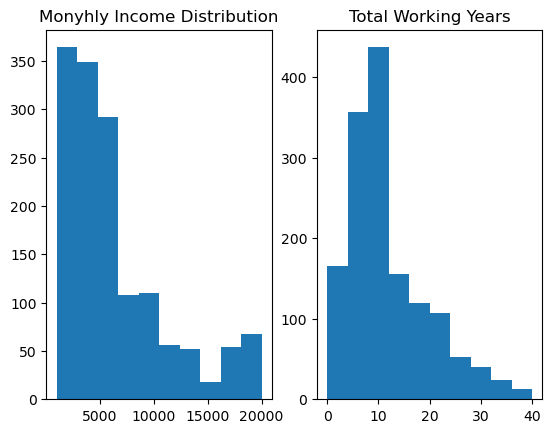

In [86]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(x=df['MonthlyIncome'])
ax[0].set_title('Monyhly Income Distribution')


ax[1].hist(x=df['TotalWorkingYears'])
ax[1].set_title('Total Working Years')

plt.show()

## Correlation - Relations

In [87]:
corr_matrix = df.corr()
corr_matrix

,Age,MonthlyIncome,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.499150,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.028829,0.299635,0.001480,-0.001961,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
MonthlyIncome,0.499150,1.000000,0.008010,-0.017328,0.094642,-0.005884,-0.015409,-0.014597,0.949815,-0.007974,0.034973,0.149009,-0.026434,-0.015267,0.025165,0.007155,0.773200,-0.021452,0.030465,0.513953,0.363221,0.344216,0.343480
DailyRate,0.010661,0.008010,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,-0.031762,0.038153,0.021564,-0.001595,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.017328,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,0.027069,-0.029251,0.040940,0.028383,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.094642,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,-0.025480,0.126317,-0.011193,-0.024721,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.005884,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,0.037210,0.012594,-0.031947,-0.030011,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.015409,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.016218,0.022157,-0.009730,-0.003365,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.014597,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.016439,0.015012,-0.018807,-0.031983,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.949815,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.040017,0.142501,-0.033893,-0.019723,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.007974,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,0.000139,-0.055699,0.021412,0.004810,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


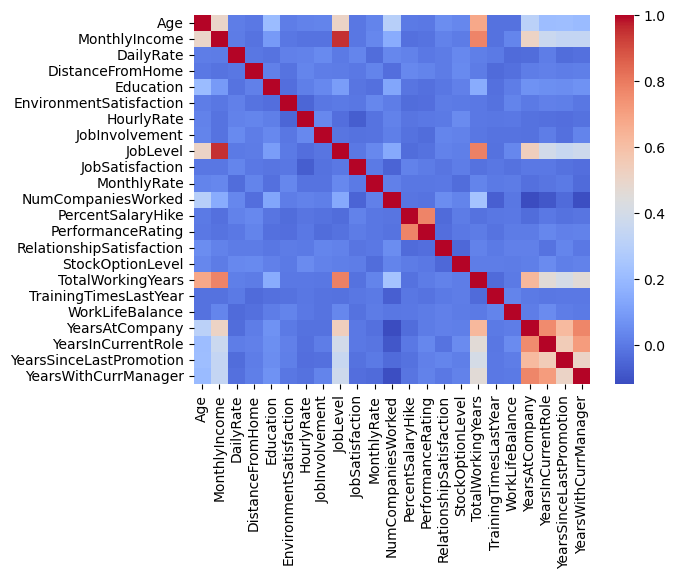

In [88]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

**Lets check Job level and total working YEARS Relationship**

In [89]:
## total working hours diye sorulmus ancak oyle bir veri yok, YEARS olarak sorulmasi da daha mantikli zaten

In [90]:
corr_total_working_years = df['JobLevel'].corr(df['TotalWorkingYears'])
corr_total_working_years

0.7822078045362728

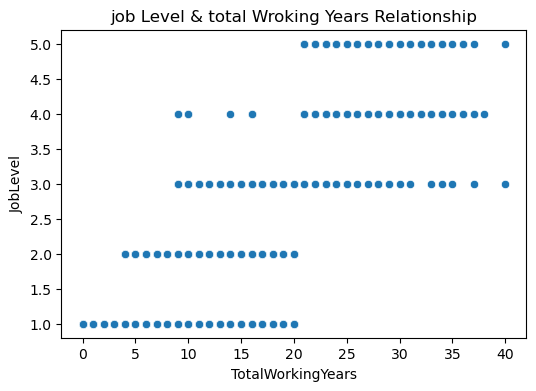

In [91]:
plt.figure(figsize=(6, 4))
sns.scatterplot(y=df['JobLevel'], x=df['TotalWorkingYears'] )
plt.title('job Level & total Wroking Years Relationship')
plt.show()

**Monthly income is strongly correlated with Job level**

In [92]:
corr_monthly_income = df['MonthlyIncome'].corr(df['JobLevel'])
corr_monthly_income

0.9498151167122523

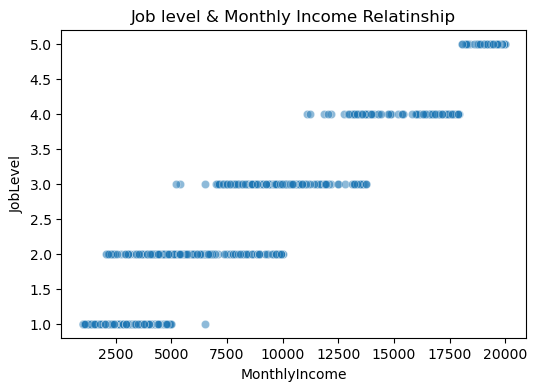

In [93]:
plt.figure(figsize=(6, 4))
sns.scatterplot( 'MonthlyIncome', 'JobLevel', data=df , alpha=0.5)
plt.title('Job level & Monthly Income Relatinship')
plt.show()

correlation is very high and positive between two variables, its 0.95

**I think relationship between a discrete numerical varaible and a continuous numerical variable is better visible with a simple lineplot.**

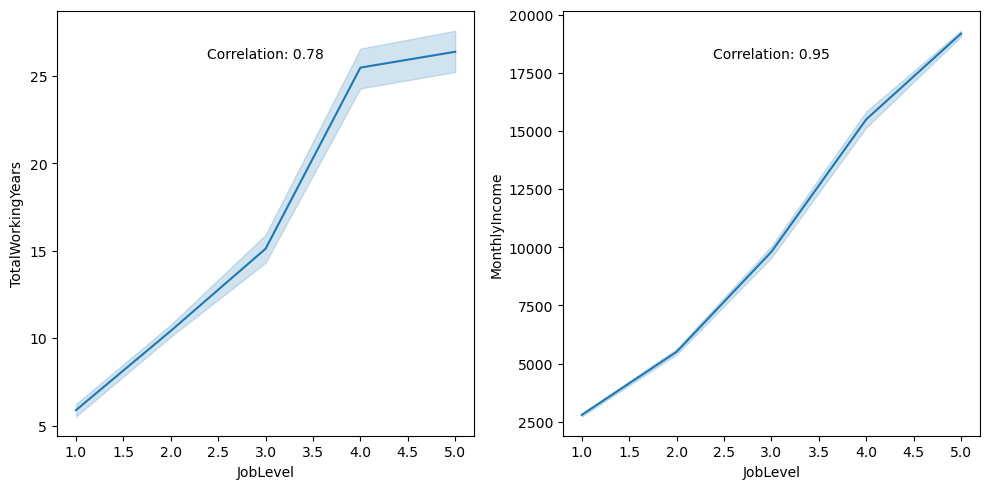

In [94]:
fig, ax = plt.subplots(1, 2, figsize =  (10, 5))
sns.lineplot(data = df, x = "JobLevel", y = "TotalWorkingYears", ax = ax[0]); 
sns.lineplot(data = df, x = "JobLevel", y = "MonthlyIncome", ax = ax[1]);

ax[0].text(0.5, 0.9, f'Correlation: {corr_total_working_years:.2f}', ha='center', va='center', transform=ax[0].transAxes)
ax[1].text(0.5, 0.9, f'Correlation: {corr_monthly_income:.2f}', ha='center', va='center', transform=ax[1].transAxes)

plt.tight_layout()
plt.show()

**Age is also strongly correlated with monthly income**

In [95]:
corr_age = df['Age'].corr(df['MonthlyIncome'])
corr_age

0.49915042867641574

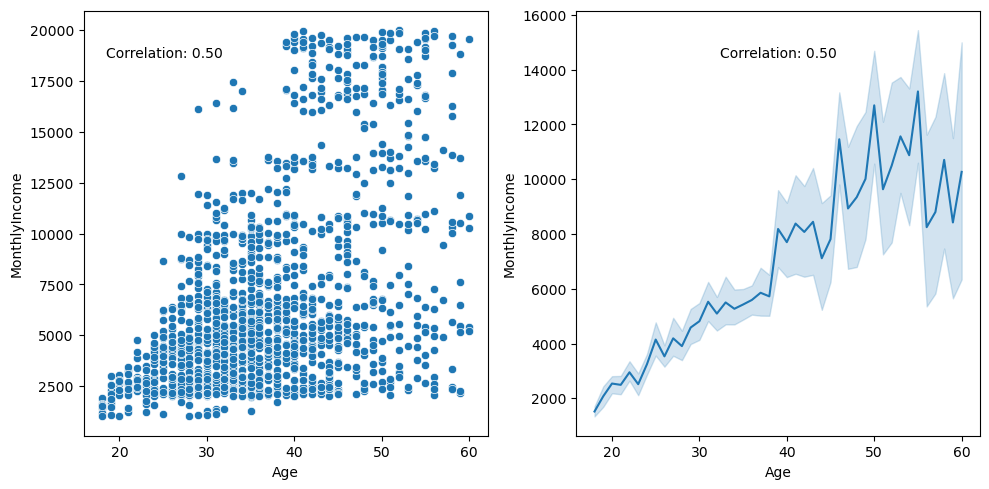

In [96]:
fig, ax = plt.subplots(1, 2, figsize =  (10, 5))
sns.scatterplot(data = df, x = "Age", y = "MonthlyIncome", ax = ax[0]); 
sns.lineplot(data = df, x = "Age", y = "MonthlyIncome", ax = ax[1]);

ax[0].text(0.2, 0.9, f'Correlation: {corr_age:.2f}', ha='center', va='center', transform=ax[0].transAxes)
ax[1].text(0.5, 0.9, f'Correlation: {corr_age:.2f}', ha='center', va='center', transform=ax[1].transAxes)

plt.tight_layout()
plt.show()

In [97]:
df['Attrition_b'] = df['Attrition'].map({'Yes': 1, 'No': 0})

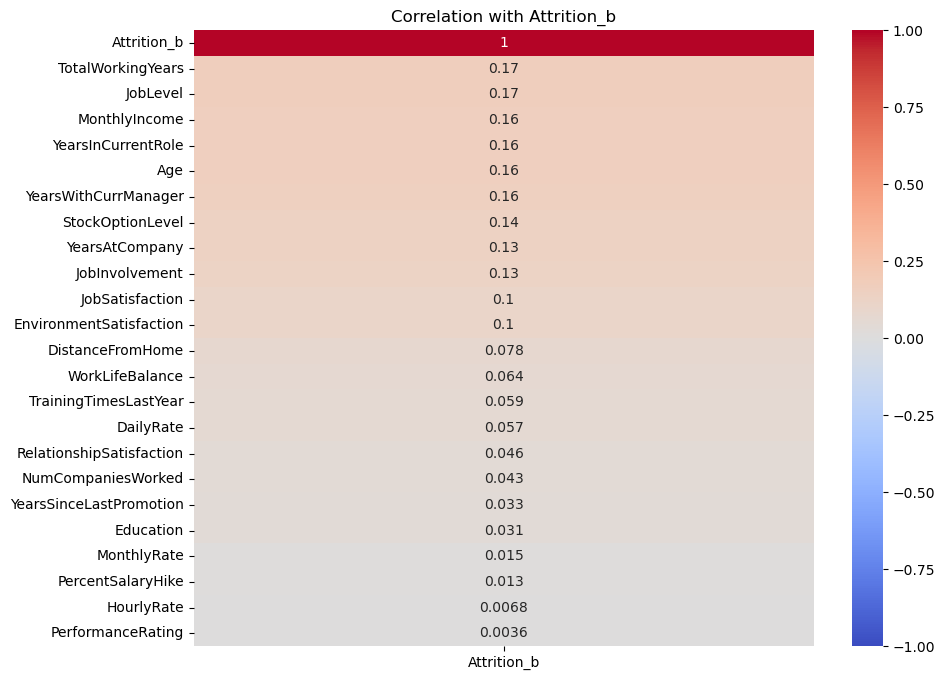

In [98]:
target_column = 'Attrition_b'
corr_matrix = df.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Correlation with {target_column}')
plt.show()

## Bonus: Manually adjusting the colors of a heatmap

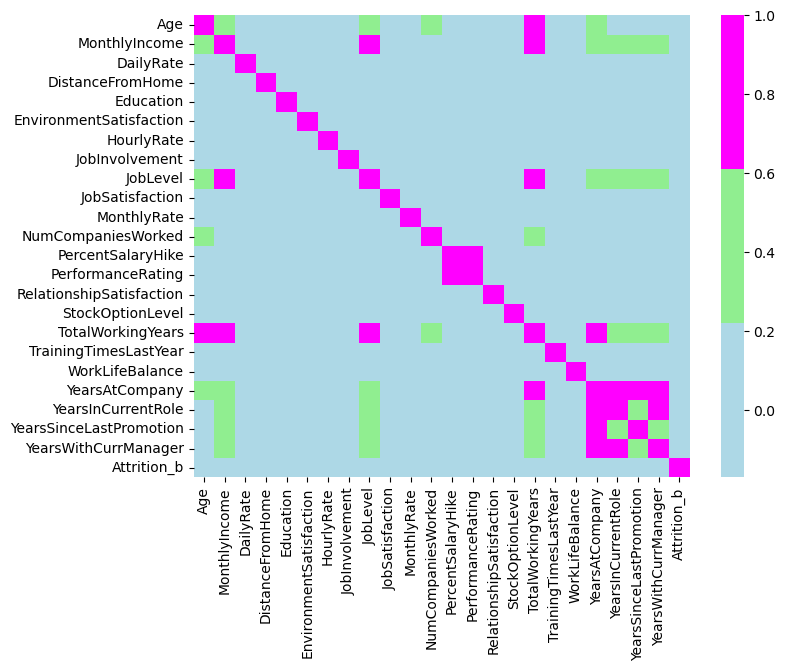

In [99]:
import matplotlib.colors as mcolors
corr_tier_1 = [0.0, 0.5]
corr_tier_2 = [0.501, 0.8]
corr_tier_3 = [0.801, 1]

def custom_color_map(value):
    if (value in corr_tier_1):
        return 'lightgrey'
    elif value in  corr_tier_2:
        return 'blue'
    else:
        return 'red'
 
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap=mcolors.ListedColormap(['lightblue', 'lightgreen', 'magenta']))
plt.show()